In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# データ保存先
DATA_DIR = "./data/"

# データのロード
X_test = np.load(os.path.join(DATA_DIR, "X_test.npy"))
y_test = np.load(os.path.join(DATA_DIR, "y_test.npy"))

# Transformer モデルのロード
model_path = os.path.join(DATA_DIR, "transformer_model.keras")
model = tf.keras.models.load_model(model_path)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# 結果を表示
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3855 - loss: 1.7108   
Test Loss: 1.6956
Test Accuracy: 0.3940


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


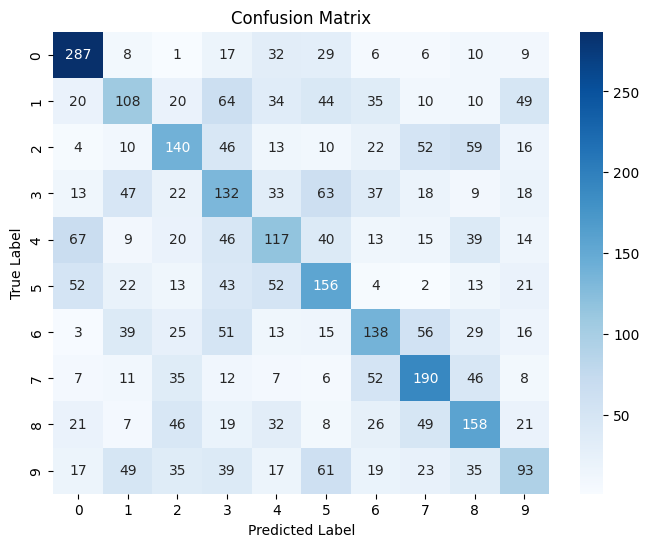

Classification Report:

              precision    recall  f1-score   support

           0     0.5845    0.7086    0.6406       405
           1     0.3484    0.2741    0.3068       394
           2     0.3922    0.3763    0.3841       372
           3     0.2814    0.3367    0.3066       392
           4     0.3343    0.3079    0.3205       380
           5     0.3611    0.4127    0.3852       378
           6     0.3920    0.3584    0.3745       385
           7     0.4513    0.5080    0.4780       374
           8     0.3873    0.4083    0.3975       387
           9     0.3509    0.2397    0.2848       388

    accuracy                         0.3940      3855
   macro avg     0.3883    0.3931    0.3879      3855
weighted avg     0.3890    0.3940    0.3886      3855



In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🚀 予測の実行
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # クラスラベルに変換
y_true = np.argmax(y_test, axis=1)  # 正解ラベル

# 🚀 混同行列の計算
cm = confusion_matrix(y_true, y_pred_classes)

# 🚀 混同行列のプロット
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

# 🚀 クラス別の精度指標（Precision / Recall / F1-score）を算出
report = classification_report(y_true, y_pred_classes, digits=4)

# 🚀 結果の表示
print("Classification Report:\n")
print(report)
